<a href="https://colab.research.google.com/github/yuuki-kusumoto/kusumoto/blob/main/sin_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 14.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!pip install transformers
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install MeCab
!pip install mecab-python3
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 kB 43.7 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  li

In [ ]:
import subprocess

cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')

In [ ]:
!pip install ipadic
!pip install mecab-python3
!pip install unidic-lite
# MeCabとtransformersを用意する
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
# 以下で報告があるようにmecab-python3のバージョンを0.996.5にしないとtokezerで落ちる
# https://stackoverflow.com/questions/62860717/huggingface-for-japanese-tokenizer
!pip install mecab-python3==0.996.5
!pip install unidic-lite # これないとMeCab実行時にエラーで落ちる
!pip install transformers
!pip install "transformers==2.5.1"
!pip install "torchtext== 0.11"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 77.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556723 sha256=d4e9633f869f4cb830c443d06f289d690c1bbbf72653728d6510d0aeafd27daf
  Stored in directory: /root/.cache/pip/wheels/33/8b/99/cf0d27191876637cd3639a560f93aa982d7855ce826c94348b
Successfully built ipadic
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=fba79c47d3155f981c52507dcfbf339c53c6f2c7bbc23a42a34da5f413530c23
  Stored i

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import subprocess

cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')

import torch
import transformers
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer
from transformers import BertJapaneseTokenizer, BertForMaskedLM
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import Subset
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# パッケージのimport
import numpy as np
import random
import torch.nn as nn
import torch.optim as optim
import torchtext

# 必要なパッケージのimport
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchtext


! curl http://www.cl.ecei.tohoku.ac.jp/resources/sent_lex/pn.csv.m3.120408.trim > pn.csv


model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

# model_nameはここから取得(cf. https://huggingface.co/transformers/pretrained_models.html)
model_name = "cl-tohoku/bert-base-japanese"
tokenizer = BertJapaneseTokenizer.from_pretrained(model_name)

import warnings
warnings.filterwarnings('ignore')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  676k  100  676k    0     0   315k      0  0:00:02  0:00:02 --:--:--  315k


Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/258k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

In [ ]:
!pip install oseti
!pip install janome
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for oseti: filename=oseti-0.2-py3-none-any.whl size=74373 sha256=9dc8f7d2a088b6584a9cf394e6bee5cefb745a6d659aae11cd56d003db5a344e
  Stored in directory: /root/.cache/pip/wheels/a6/f4/ff/fca1e4d414c420cca3f2680150ce7b430076f7364741b70e3d
  Created wheel for neologdn: filename=neologdn-0.5.1-cp37-cp37m-linux_x86_64.whl size=172964 sha256=bb01c252d85c572d662828671281f3db91db79a03050341e9d5debbd63670ae1
  Stored in directory: /root/.cache/pip/wheels/19/15/5c/55b33d02e16129ef81313

In [ ]:
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.charfilter import *

In [ ]:
import pandas as pd
import numpy as np

DFF3 = pd.read_csv("Travel_version2.csv", encoding="cp932")
#print(DFF3.dtypes)
DFF3

FileNotFoundError: ignored

In [ ]:
import MeCab
from gensim import corpora
from gensim import matutils
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

import MeCab
import oseti
import matplotlib.pylab as plt

analyzer = oseti.Analyzer()
tok = analyzer.analyze_detail

In [ ]:
#朝食
bre_df = pd.read_csv("breakfast_only.csv", encoding="cp932")
#print(bre_df)

#夕食
din_df = pd.read_csv("dinner_only.csv", encoding="cp932")
din_df

#風呂
bat_df = pd.read_csv("bath_only.csv", encoding="cp932")
bat_df

#サービス
ser_df = pd.read_csv("service_only.csv", encoding="cp932")
print(ser_df.dtypes)
display(ser_df)

#立地
sta_df = pd.read_csv("state_only.csv", encoding="cp932")
sta_df

#施設
fac_df = pd.read_csv("facility_only.csv", encoding="cp932")
fac_df

#部屋
roo_df = pd.read_csv("room_only.csv", encoding="cp932")

total_text    object
value_text    object
label          int64
dtype: object


,total_text,value_text,label
0,スタッフの方も皆さん親切丁寧ででしたし、ゆっくり過ごさせていただきました。,親切丁寧,1
1,部屋も綺麗で、対応もよく、朝食もおいしいのでとても満足しています。,綺麗おいしい満足満足 する,1
2,スタッフの方もいい方たちで、好感が持てました。,好感,1
3,一部の方が指摘した通り、廊下がタバコ臭いのが気になりました。,指摘臭い気,0
4,また、さりげなくカップルと家族連れを離れた席にしてくださったのも落ち着けて食事できてよかったです。,さりげ ない落ち着ける,1
...,...,...,...
15154,スタッフみなさんの対応も細やかで、お値段以上の満足感でした。,値段細やか満足,1
15155,お部屋は古いものの、広さも含めまずまずでしたが、バスルームに髪の毛が数本残っていたのが残念です。,残念まずまず,0
15156,朝食は、チェックイン時に、混みますよと言われたので、6：30のスタート前に行きましたが、早目...,混むスムース出来る,1
15157,接客も丁寧お部屋はクラシカルな雰囲気です清潔感もある！,丁寧雰囲気清潔,1


In [ ]:
#朝食
bre_df = pd.read_csv("breakfast_only.csv", encoding="cp932")
#print(bre_df)

#夕食
din_df = pd.read_csv("dinner_only.csv", encoding="cp932")
din_df

#風呂
bat_df = pd.read_csv("bath_only.csv", encoding="cp932")
bat_df

#サービス
ser_df = pd.read_csv("service_only.csv", encoding="cp932")
print(ser_df.dtypes)
display(ser_df)

#立地
sta_df = pd.read_csv("state_only.csv", encoding="cp932")
sta_df

#施設
fac_df = pd.read_csv("facility_only.csv", encoding="cp932")
fac_df

#部屋
roo_df = pd.read_csv("room_only.csv", encoding="cp932")

# tsvファイルで保存する
tr_df = ser_df
# 全体の2割の文章数
train, test = train_test_split(tr_df, test_size=0.2, random_state=0)

# 前から2割をテストデータとする
test.to_csv("./test.tsv", sep='\t', index=False, header=None)
print(test.shape)

# 前2割からを訓練&検証データとする
train.to_csv("./train.tsv", sep='\t', index=False, header=None)
print(train.shape)

print("データ数", len(tr_df["label"]))
print("正例", sum(tr_df["label"]))
print("負例", len(tr_df["label"]) - sum(tr_df["label"]))

(3032, 3)
(12127, 3)
データ数 15159
正例 11277
負例 3882


In [ ]:
from torchtext.legacy.data import Field

def tokenizer_512(input_text):
    """torchtextのtokenizerとして扱えるように、512単語のpytorchでのencodeを定義。ここで[0]を指定し忘れないように"""
    return tokenizer.encode(input_text, max_length=100, return_tensors='pt')[0]


TEXT1 = torchtext.legacy.data.Field(sequential=True, tokenize=tokenizer_512, use_vocab=False, lower=False,include_lengths=True, batch_first=True, fix_length=100, pad_token=0)
# 注意：tokenize=tokenizer.encodeと、.encodeをつけます。padding[PAD]のindexが0なので、0を指定します。

TEXT2 = torchtext.legacy.data.Field(sequential=True, tokenize=tokenizer_512, use_vocab=False, lower=False,include_lengths=True, batch_first=True, fix_length=100, pad_token=0)
# 注意：tokenize=tokenizer.encodeと、.encodeをつけます。padding[PAD]のindexが0なので、0を指定します。

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL2 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL3 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL4 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL5 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL6 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL7 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL8 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL9 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL10 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL11 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL12 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL13 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

#ラベルは数字なのでラベル用オブジェクトはsequential = False
LABEL14 = torchtext.legacy.data.Field(sequential=False, use_vocab=False)

# 各tsvファイルを読み込み、分かち書きをしてdatasetに
# train_eval：61300個、test：15324個
dataset_train_eval, dataset_test = torchtext.legacy.data.TabularDataset.splits(
    path='.', train='train.tsv', test='test.tsv', format='tsv', fields=[('Text1', TEXT1),('Text2', TEXT2), ('Label', LABEL)])


In [ ]:
# torchtext.data.Datasetのsplit関数で訓練データと検証データを分ける
# train_eval：4000個、test：2000個

dataset_train, dataset_eval = dataset_train_eval.split(
    split_ratio = 1 - 0.25, random_state=random.seed(1234))

# datasetの長さを確認してみる
print(dataset_train.__len__())
print(dataset_eval.__len__())
print(dataset_test.__len__())

9095
3032
3032


In [ ]:
# 乱数シードの固定

import os
import random
import numpy as np
import torch

SEED_VALUE = 1234  # これはなんでも良い
os.environ['PYTHONHASHSEED'] = str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)  # PyTorchを使う場合

# torchtext.data.Datasetのsplit関数で訓練データと検証データを分ける
# train_eval：4000個、test：2000個

dataset_train, dataset_eval = dataset_train_eval.split(
    split_ratio = 1 - 0.2, random_state=random.seed(1234))

# datasetの長さを確認してみる
print(dataset_train.__len__())
print(dataset_eval.__len__())
print(dataset_test.__len__())

# datasetの中身を確認してみる
item = next(iter(dataset_train))
print(item.Text2)
print("長さ：", len(item.Text2))  # 長さを確認 [CLS]から始まり[SEP]で終わる。512より長いと後ろが切れる
print("ラベル：", item.Label)

# DataLoaderを作成

batch_size = 40

dl_train = torchtext.legacy.data.Iterator(
    dataset_train, batch_size=batch_size, train=True)

dl_eval = torchtext.legacy.data.Iterator(
    dataset_eval, batch_size=batch_size, train=False, sort=False)

dl_test = torchtext.legacy.data.Iterator(
    dataset_test, batch_size=batch_size, train=False, sort=False)

# 辞書オブジェクトにまとめる
dataloaders_dict = {"train": dl_train, "val": dl_eval}

9702
2425
3032
tensor([    2, 19699,  8837, 17633,     3])
長さ： 5
ラベル： 1


67
5.320535655386239


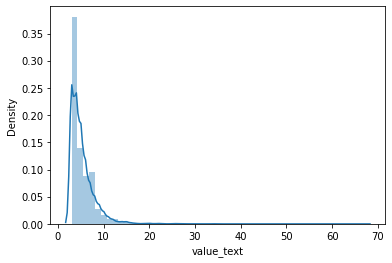

In [ ]:
# 日本語BERTで扱える文章の長さは512
import seaborn as sns
title_length = tr_df['value_text'].map(tokenizer.encode).map(len)
print(max(title_length))
print(title_length.mean())

sns.distplot(title_length)

86
27.44396068342239


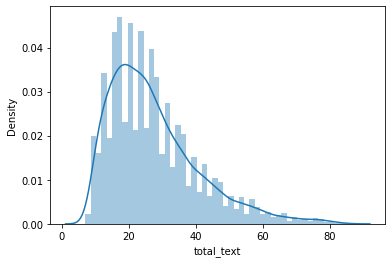

In [ ]:
# 日本語BERTで扱える文章の長さは512
import seaborn as sns
title_length = tr_df['total_text'].map(tokenizer.encode).map(len)
print(max(title_length))
print(title_length.mean())

sns.distplot(title_length)

In [ ]:
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import Subset
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
from torch import nn

class BertForReview(nn.Module):
    '''BERTモデルにレビュー文の2クラスを判定する部分をつなげたモデル'''

    def __init__(self):
        super(BertForReview, self).__init__()

        # BERTモジュール
        #self.bert = model  # 日本語学習済みのBERTモデル

        self.bert = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking',
                                              output_attentions=True,
                                              output_hidden_states=True)

        # headにポジネガ予測を追加
        # 入力はBERTの出力特徴量の次元768、出力は14クラス
        #cls層の追加
        self.cls = nn.Linear(in_features=768, out_features=2)
        
        # 重み初期化処理
        nn.init.normal_(self.cls.weight, std=0.02)
        nn.init.normal_(self.cls.bias, 0)    
    
    def forward(self, input_ids):
        '''
        input_ids： [batch_size, sequence_length]の文章の単語IDの羅列
        '''

        # BERTの基本モデル部分の順伝搬
        # 順伝搬させる
        #print("input_ids :", input_ids)
        result = self.bert(input_ids)  # reult は、sequence_output, pooled_output
        #result, _, attentions = self.bert(input_ids, output_attentions=True)

        all_attentions = result[2]
        last_layer_attention = all_attentions[-1]
        hidden_states = result[3]

        m = nn.Softmax(dim=1)

        #vec1 = self._get_cls_vec(hidden_states[-1])
        # sequence_outputの先頭の単語ベクトルを抜き出す
        vec_0 = result[0]  # 最初の0がsequence_outputを示す
        vec_02 = vec_0[:, 0, :]  # 全バッチ。先頭0番目の単語の全768要素。　つまりclsトークンを獲得している。
        vec_02 = vec_02.view(-1, 768)  # sizeを[batch_size, hidden_size] clsトークン
        vec_03 = vec_0[:, 0:100, :] #文章の埋め込み表現
        output = self.cls(vec_02)  # 全結合層
        A = F.log_softmax(output, dim=1)
        B = m(output)

        #return vec_02, vec_03, last_layer_attention,hidden_states  #vec_02 : clsトークン, #vec_03 : 文章の特徴量
        
        return output, all_attentions, vec_02, vec_03


In [ ]:
# モデル構築
BERT_net = BertForReview()

# 訓練モードに設定
BERT_net.train()

print('ネットワーク設定完了')

ネットワーク設定完了


朝食

In [ ]:
# 勾配計算を最後のBertLayerモジュールと追加した分類アダプターのみ実行

# 1. まず全部を、勾配計算Falseにしてしまう
for param in BERT_net.parameters():
    param.requires_grad = False

# 2. BertLayerモジュールの最後を勾配計算ありに変更
for param in BERT_net.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# 3. 識別器を勾配計算ありに変更
for param in BERT_net.cls.parameters():
    param.requires_grad = True

# BERTの元の部分はファインチューニング
bert_optimizer = optim.Adam([
    {'params': BERT_net.bert.encoder.layer[-1].parameters(), 'lr': 1e-4},
    {'params': BERT_net.cls.parameters(), 'lr': 1e-3}
])

# 損失関数の設定
criterion = nn.CrossEntropyLoss()

# モデルを学習させる関数を作成
# GPUが使えるかを確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

 # モデルを学習させる関数を作成
def Pa_Numpy(pa3):
  pa_numpy = []
  for i in range(0, len(pa3)):
    if sum(pa3[i]) >0:
      pa_numpy = np.append(pa_numpy, 1)
    else:
      pa_numpy = np.append(pa_numpy, 0)

  paa = pa_numpy
  paa_T = paa.T
  return paa_T

def train_model(bert_net,dataloaders_dict, criterion, optimizer1,num_epochs):

  # GPUが使えるかを確認
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print("使用デバイス：", device)
  print('-----start-------')

  # ネットワークをGPUへ
  bert_net.to(device)
  #tc_net.to(device)
  
  train_loss1 = []
  val_loss1 = []
  acc_train_list1 = []
  acc_val_list1 = []
  acc_train_list1 = []
  acc_val_list1 = []
  train_loss2 = []
  val_loss2 = []
  acc_train_list2 = []
  acc_val_list2 = []
  acc_train_list2 = []
  acc_val_list2 = []
  total_label_list = []

  out_list = []
  # ネットワークがある程度固定であれば、高速化させる
  torch.backends.cudnn.benchmark = True

    # epochのループ
  for epoch in range(num_epochs):

        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            
            pred_list1 = []
            label_list1 = []

            pred_list2 = []
            label_list2 = []

            if phase == 'train':
                bert_net.train()  # モデルを訓練モードに
                #tc_net.train()
            else:
                bert_net.eval()   # モデルを検証モードに
                #tc_net.eval()

            epoch_loss1 = 0.0  # epochの損失和
            epoch_corrects1 = 0  # epochの正解数
            epoch_loss2 = 0.0  # epochの損失和
            epoch_corrects2 = 0  # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書オブジェクト

                # GPUが使えるならGPUにデータを送る
                inputs1 = batch.Text1[0].to(device)  # 文章
                inputs2 = batch.Text2[0].to(device)  # 評価語
                labels0 = batch.Label.to(device)  # ラベル
                #labels1 = batch.Label2.to(device)
                #pa = torch.stack([labels0, labels1], dim = 1)


                #pa2 = pa.cpu().numpy()
             # optimizerを初期化
                optimizer1.zero_grad()


                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):
                    
                    #tensor型の正解データpaをnumpy型に変換
                    #0クラス目のデータの諸々を取得し、学習#######################################################
                    #label_class1 = pa2[:, :2]
                    #pa31 = Pa_Numpy(label_class1)

                    #正解ラベル
                    #pa4_0 = torch.tensor(pa31, dtype=torch.int64).to(device)


                    outputs, BERT_atten, Bert_cls, Bert_text = bert_net(inputs1)
                    loss1 = criterion(outputs, labels0)

                    _, preds = torch.max(outputs, 1)  # ラベルを予測
                    
                    m = nn.Softmax(dim=1)
                    outputs = m(outputs)
                    aa = preds.cpu().numpy()
                    bb = labels0.cpu().numpy()
                    pred_list1 = np.append(pred_list1, aa)
                    label_list1 = np.append(label_list1, bb)


                    out_elements = outputs.cpu().detach().numpy()
                    out_list = np.append(out_list, out_elements)


                    if phase == "train":
                      # 訓練時は逆誤差伝搬
                      loss1.backward()
                      optimizer1.step()


                    # 損失と正解数の合計を更新
                    epoch_loss1 += loss1.item() * batch_size


            # epochごとのlossと正解率
#BERT
            epoch_loss1 = epoch_loss1 / len(dataloaders_dict[phase].dataset)
            epoch_acc1 = accuracy_score(pred_list1, label_list1)
#Transformer


            if phase == 'train':
              train_loss1 = np.append(train_loss1, epoch_loss1)
              acc_train_list1 = np.append(acc_train_list1, epoch_acc1)                 #BERT

            elif phase == "val":
              val_loss1 = np.append(val_loss1, epoch_loss1)
              acc_val_list1 = np.append(acc_val_list1, epoch_acc1)                   #Transformer
     #BERT

              cm1 = confusion_matrix(label_list1, pred_list1)                       #Transformer
                  #BERT
              
              print("\n BERT 混合行列", cm1, sep="\n")

            print('Epoch of BERT {}/{} | {:^5} | Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs,
                                                                           phase, epoch_loss1, epoch_acc1))
  
  out_list = out_list.reshape(int(len(out_list)/2), 2)

  return  bert_net, Bert_cls, train_loss1, val_loss1, acc_train_list1, acc_val_list1, out_list, pred_list1

使用デバイス： cuda:0
-----start-------


In [ ]:
# 学習・検証を実行する。
num_epochs = 15
net_trained1, bertcls,trainloss1, valloss1, acctrain1, accval1, OUT_LIST, PRED_LIST = train_model(BERT_net,  dataloaders_dict,criterion, bert_optimizer, num_epochs=num_epochs)

使用デバイス： cuda:0
-----start-------
Epoch of BERT 1/15 | train | Loss: 0.4112 Acc: 0.8188

 BERT 混合行列
[[ 324  274]
 [  46 1781]]
Epoch of BERT 1/15 |  val  | Loss: 0.3822 Acc: 0.8680
Epoch of BERT 2/15 | train | Loss: 0.2876 Acc: 0.8822

 BERT 混合行列
[[ 369  229]
 [  47 1780]]
Epoch of BERT 2/15 |  val  | Loss: 0.2816 Acc: 0.8862
Epoch of BERT 3/15 | train | Loss: 0.2667 Acc: 0.8905

 BERT 混合行列
[[ 412  186]
 [  68 1759]]
Epoch of BERT 3/15 |  val  | Loss: 0.2500 Acc: 0.8953
Epoch of BERT 4/15 | train | Loss: 0.2352 Acc: 0.9052

 BERT 混合行列
[[ 391  207]
 [  49 1778]]
Epoch of BERT 4/15 |  val  | Loss: 0.2596 Acc: 0.8944
Epoch of BERT 5/15 | train | Loss: 0.2198 Acc: 0.9091

 BERT 混合行列
[[ 497  101]
 [  96 1731]]
Epoch of BERT 5/15 |  val  | Loss: 0.1948 Acc: 0.9188
Epoch of BERT 6/15 | train | Loss: 0.2178 Acc: 0.9085

 BERT 混合行列
[[ 340  258]
 [  26 1801]]
Epoch of BERT 6/15 |  val  | Loss: 0.3088 Acc: 0.8829
Epoch of BERT 7/15 | train | Loss: 0.2071 Acc: 0.9150

 BERT 混合行列
[[ 444  154]
 [  67

In [ ]:
path = "drive/My Drive/Colab Notebooks/service_model_2022_0601.pth" # 保存先pathの設定
mo = net_trained1
torch.save(mo.state_dict(), path) #保存

In [ ]:
# GPUが使えるかを確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

# ミニバッチの用意
batch = next(iter(dl_test))

epoch_corrects = 0
pred_list1=[]
label_list1=[]

net_trained1
net_trained1.eval()   # モデルを検証モードに
net_trained1.to(device)  # GPUが使えるならGPUへ送る


for batch in tqdm(dl_test):
  # GPUが使えるならGPUにデータを送る
  inputs1 = batch.Text1[0].to(device)  # 文章
  inputs2 = batch.Text2[0].to(device)  # 評価語
  labels0 = batch.Label.to(device)  # ラベル
  #pa = torch.stack([labels0, labels1, labels2, labels3, labels4,labels5,labels6,labels7,labels8,labels9, labels10, labels11,labels12,labels13], dim = 1)
  #pa2 = pa.cpu().numpy()

  #label_class1 = pa2[:, :2]
  #0クラス目のデータの諸々を取得し、学習#######################################################
  #pa31 = Pa_Numpy(label_class1)
  #正解ラベル
  #pa4_0 = torch.tensor(pa31, dtype=torch.int64).to(device)
  
  Outputs, BERT_atten, BERT_cls, BERT_text = net_trained1(inputs1)
  loss1 = criterion(Outputs, labels0)

  _, preds = torch.max(Outputs, 1)  # ラベルを予測

  
  #Label_cls, preds = LabelCls_convert(Outputs)  # ラベルを予測

  epoch_corrects += torch.sum(preds == labels0)

  aa1 = preds.cpu().numpy()
  bb1 = labels0.cpu().numpy()
  pred_list1 = np.append(pred_list1, aa1)
  label_list1 = np.append(label_list1, bb1)

cm1 = confusion_matrix(label_list1, pred_list1)
print("\n BERT", cm1,sep="\n")

epoch_acc = epoch_corrects.double() / len(dl_test.dataset)
        
print('テストデータ{}個での正解率：{:.4f}'.format(len(dl_test.dataset), epoch_acc))

使用デバイス： cuda:0
-----start-------


100%|██████████| 76/76 [00:05<00:00, 14.07it/s]


 BERT
[[ 611  175]
 [  50 2196]]
テストデータ3032個での正解率：0.9258


In [ ]:
bremo_se = BertForReview()
bremo_se.load_state_dict(torch.load("drive/My Drive/Colab Notebooks/room_model_2022_0601.pth"))

In [ ]:
# 勾配計算を最後のBertLayerモジュールと追加した分類アダプターのみ実行

# 1. まず全部を、勾配計算Falseにしてしまう
for param in BERT_net.parameters():
    param.requires_grad = False

# 2. BertLayerモジュールの最後を勾配計算ありに変更
for param in BERT_net.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# 3. 識別器を勾配計算ありに変更
for param in BERT_net.cls.parameters():
    param.requires_grad = True

# BERTの元の部分はファインチューニング
bert_optimizer = optim.Adam([
    {'params': BERT_net.bert.encoder.layer[-1].parameters(), 'lr': 1e-4},
    {'params': BERT_net.cls.parameters(), 'lr': 1e-3}
])

# 損失関数の設定
criterion = nn.CrossEntropyLoss()

# モデルを学習させる関数を作成
# GPUが使えるかを確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

 # モデルを学習させる関数を作成
def Pa_Numpy(pa3):
  pa_numpy = []
  for i in range(0, len(pa3)):
    if sum(pa3[i]) >0:
      pa_numpy = np.append(pa_numpy, 1)
    else:
      pa_numpy = np.append(pa_numpy, 0)

  paa = pa_numpy
  paa_T = paa.T
  return paa_T

def train_model(bert_net,dataloaders_dict, criterion, optimizer1,num_epochs):

  # GPUが使えるかを確認
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print("使用デバイス：", device)
  print('-----start-------')

  # ネットワークをGPUへ
  bert_net.to(device)
  #tc_net.to(device)
  
  train_loss1 = []
  val_loss1 = []
  acc_train_list1 = []
  acc_val_list1 = []
  acc_train_list1 = []
  acc_val_list1 = []
  train_loss2 = []
  val_loss2 = []
  acc_train_list2 = []
  acc_val_list2 = []
  acc_train_list2 = []
  acc_val_list2 = []
  total_label_list = []

  out_list = []
  # ネットワークがある程度固定であれば、高速化させる
  torch.backends.cudnn.benchmark = True

    # epochのループ
  for epoch in range(num_epochs):

        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            
            pred_list1 = []
            label_list1 = []

            pred_list2 = []
            label_list2 = []

            if phase == 'train':
                bert_net.train()  # モデルを訓練モードに
                #tc_net.train()
            else:
                bert_net.eval()   # モデルを検証モードに
                #tc_net.eval()

            epoch_loss1 = 0.0  # epochの損失和
            epoch_corrects1 = 0  # epochの正解数
            epoch_loss2 = 0.0  # epochの損失和
            epoch_corrects2 = 0  # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書オブジェクト

                # GPUが使えるならGPUにデータを送る
                inputs1 = batch.Text1[0].to(device)  # 文章
                inputs2 = batch.Text2[0].to(device)  # 評価語
                labels0 = batch.Label.to(device)  # ラベル
                #labels1 = batch.Label2.to(device)
                #pa = torch.stack([labels0, labels1], dim = 1)


                #pa2 = pa.cpu().numpy()
             # optimizerを初期化
                optimizer1.zero_grad()


                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):
                    
                    #tensor型の正解データpaをnumpy型に変換
                    #0クラス目のデータの諸々を取得し、学習#######################################################
                    #label_class1 = pa2[:, :2]
                    #pa31 = Pa_Numpy(label_class1)

                    #正解ラベル
                    #pa4_0 = torch.tensor(pa31, dtype=torch.int64).to(device)


                    outputs, BERT_atten, Bert_cls, Bert_text = bert_net(inputs1)
                    loss1 = criterion(outputs, labels0)

                    _, preds = torch.max(outputs, 1)  # ラベルを予測
                    
                    m = nn.Softmax(dim=1)
                    outputs = m(outputs)
                    aa = preds.cpu().numpy()
                    bb = labels0.cpu().numpy()
                    pred_list1 = np.append(pred_list1, aa)
                    label_list1 = np.append(label_list1, bb)


                    out_elements = outputs.cpu().detach().numpy()
                    out_list = np.append(out_list, out_elements)


                    if phase == "train":
                      # 訓練時は逆誤差伝搬
                      loss1.backward()
                      optimizer1.step()


                    # 損失と正解数の合計を更新
                    epoch_loss1 += loss1.item() * batch_size


            # epochごとのlossと正解率
#BERT
            epoch_loss1 = epoch_loss1 / len(dataloaders_dict[phase].dataset)
            epoch_acc1 = accuracy_score(pred_list1, label_list1)
#Transformer


            if phase == 'train':
              train_loss1 = np.append(train_loss1, epoch_loss1)
              acc_train_list1 = np.append(acc_train_list1, epoch_acc1)                 #BERT

            elif phase == "val":
              val_loss1 = np.append(val_loss1, epoch_loss1)
              acc_val_list1 = np.append(acc_val_list1, epoch_acc1)                   #Transformer
     #BERT

              cm1 = confusion_matrix(label_list1, pred_list1)                       #Transformer
                  #BERT
              
              print("\n BERT 混合行列", cm1, sep="\n")

            print('Epoch of BERT {}/{} | {:^5} | Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs,
                                                                           phase, epoch_loss1, epoch_acc1))
  
  out_list = out_list.reshape(int(len(out_list)/2), 2)

  return  bert_net, Bert_cls, train_loss1, val_loss1, acc_train_list1, acc_val_list1, out_list, pred_list1
  
# 学習・検証を実行する。1epochに20分ほどかかります
num_epochs = 15
net_trained1, bertcls,trainloss1, valloss1, acctrain1, accval1, OUT_LIST, PRED_LIST = train_model(BERT_net,  dataloaders_dict,criterion, bert_optimizer, num_epochs=num_epochs)
path = "drive/My Drive/Colab Notebooks/facility_model_2022_0601.pth" # 保存先pathの設定
mo = net_trained1
torch.save(mo.state_dict(), path) #保存
bremo_se = BertForReview()
bremo_se.load_state_dict(torch.load("drive/My Drive/Colab Notebooks/facility_model_2022_0601.pth"))

In [ ]:
# 勾配計算を最後のBertLayerモジュールと追加した分類アダプターのみ実行

# 1. まず全部を、勾配計算Falseにしてしまう
for param in BERT_net.parameters():
    param.requires_grad = False

# 2. BertLayerモジュールの最後を勾配計算ありに変更
for param in BERT_net.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# 3. 識別器を勾配計算ありに変更
for param in BERT_net.cls.parameters():
    param.requires_grad = True

# BERTの元の部分はファインチューニング
bert_optimizer = optim.Adam([
    {'params': BERT_net.bert.encoder.layer[-1].parameters(), 'lr': 1e-4},
    {'params': BERT_net.cls.parameters(), 'lr': 1e-3}
])

# 損失関数の設定
criterion = nn.CrossEntropyLoss()

# モデルを学習させる関数を作成
# GPUが使えるかを確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

 # モデルを学習させる関数を作成
def Pa_Numpy(pa3):
  pa_numpy = []
  for i in range(0, len(pa3)):
    if sum(pa3[i]) >0:
      pa_numpy = np.append(pa_numpy, 1)
    else:
      pa_numpy = np.append(pa_numpy, 0)

  paa = pa_numpy
  paa_T = paa.T
  return paa_T

def train_model(bert_net,dataloaders_dict, criterion, optimizer1,num_epochs):

  # GPUが使えるかを確認
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print("使用デバイス：", device)
  print('-----start-------')

  # ネットワークをGPUへ
  bert_net.to(device)
  #tc_net.to(device)
  
  train_loss1 = []
  val_loss1 = []
  acc_train_list1 = []
  acc_val_list1 = []
  acc_train_list1 = []
  acc_val_list1 = []
  train_loss2 = []
  val_loss2 = []
  acc_train_list2 = []
  acc_val_list2 = []
  acc_train_list2 = []
  acc_val_list2 = []
  total_label_list = []

  out_list = []
  # ネットワークがある程度固定であれば、高速化させる
  torch.backends.cudnn.benchmark = True

    # epochのループ
  for epoch in range(num_epochs):

        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            
            pred_list1 = []
            label_list1 = []

            pred_list2 = []
            label_list2 = []

            if phase == 'train':
                bert_net.train()  # モデルを訓練モードに
                #tc_net.train()
            else:
                bert_net.eval()   # モデルを検証モードに
                #tc_net.eval()

            epoch_loss1 = 0.0  # epochの損失和
            epoch_corrects1 = 0  # epochの正解数
            epoch_loss2 = 0.0  # epochの損失和
            epoch_corrects2 = 0  # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書オブジェクト

                # GPUが使えるならGPUにデータを送る
                inputs1 = batch.Text1[0].to(device)  # 文章
                inputs2 = batch.Text2[0].to(device)  # 評価語
                labels0 = batch.Label.to(device)  # ラベル
                #labels1 = batch.Label2.to(device)
                #pa = torch.stack([labels0, labels1], dim = 1)


                #pa2 = pa.cpu().numpy()
             # optimizerを初期化
                optimizer1.zero_grad()


                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):
                    
                    #tensor型の正解データpaをnumpy型に変換
                    #0クラス目のデータの諸々を取得し、学習#######################################################
                    #label_class1 = pa2[:, :2]
                    #pa31 = Pa_Numpy(label_class1)

                    #正解ラベル
                    #pa4_0 = torch.tensor(pa31, dtype=torch.int64).to(device)


                    outputs, BERT_atten, Bert_cls, Bert_text = bert_net(inputs1)
                    loss1 = criterion(outputs, labels0)

                    _, preds = torch.max(outputs, 1)  # ラベルを予測
                    
                    m = nn.Softmax(dim=1)
                    outputs = m(outputs)
                    aa = preds.cpu().numpy()
                    bb = labels0.cpu().numpy()
                    pred_list1 = np.append(pred_list1, aa)
                    label_list1 = np.append(label_list1, bb)


                    out_elements = outputs.cpu().detach().numpy()
                    out_list = np.append(out_list, out_elements)


                    if phase == "train":
                      # 訓練時は逆誤差伝搬
                      loss1.backward()
                      optimizer1.step()


                    # 損失と正解数の合計を更新
                    epoch_loss1 += loss1.item() * batch_size


            # epochごとのlossと正解率
#BERT
            epoch_loss1 = epoch_loss1 / len(dataloaders_dict[phase].dataset)
            epoch_acc1 = accuracy_score(pred_list1, label_list1)
#Transformer


            if phase == 'train':
              train_loss1 = np.append(train_loss1, epoch_loss1)
              acc_train_list1 = np.append(acc_train_list1, epoch_acc1)                 #BERT

            elif phase == "val":
              val_loss1 = np.append(val_loss1, epoch_loss1)
              acc_val_list1 = np.append(acc_val_list1, epoch_acc1)                   #Transformer
     #BERT

              cm1 = confusion_matrix(label_list1, pred_list1)                       #Transformer
                  #BERT
              
              print("\n BERT 混合行列", cm1, sep="\n")

            print('Epoch of BERT {}/{} | {:^5} | Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs,
                                                                           phase, epoch_loss1, epoch_acc1))
  
  out_list = out_list.reshape(int(len(out_list)/2), 2)

  return  bert_net, Bert_cls, train_loss1, val_loss1, acc_train_list1, acc_val_list1, out_list, pred_list1
  
# 学習・検証を実行する。1epochに20分ほどかかります
num_epochs = 15
net_trained1, bertcls,trainloss1, valloss1, acctrain1, accval1, OUT_LIST, PRED_LIST = train_model(BERT_net,  dataloaders_dict,criterion, bert_optimizer, num_epochs=num_epochs)
path = "drive/My Drive/Colab Notebooks/bath_model_2022_0601.pth" # 保存先pathの設定
mo = net_trained1
torch.save(mo.state_dict(), path) #保存
bremo_se = BertForReview()
bremo_se.load_state_dict(torch.load("drive/My Drive/Colab Notebooks/bath_model_2022_0601.pth"))

In [ ]:
# 勾配計算を最後のBertLayerモジュールと追加した分類アダプターのみ実行

# 1. まず全部を、勾配計算Falseにしてしまう
for param in BERT_net.parameters():
    param.requires_grad = False

# 2. BertLayerモジュールの最後を勾配計算ありに変更
for param in BERT_net.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# 3. 識別器を勾配計算ありに変更
for param in BERT_net.cls.parameters():
    param.requires_grad = True

# BERTの元の部分はファインチューニング
bert_optimizer = optim.Adam([
    {'params': BERT_net.bert.encoder.layer[-1].parameters(), 'lr': 1e-4},
    {'params': BERT_net.cls.parameters(), 'lr': 1e-3}
])

# 損失関数の設定
criterion = nn.CrossEntropyLoss()

# モデルを学習させる関数を作成
# GPUが使えるかを確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

 # モデルを学習させる関数を作成
def Pa_Numpy(pa3):
  pa_numpy = []
  
  for i in range(0, len(pa3)):
    if sum(pa3[i]) >0:
      pa_numpy = np.append(pa_numpy, 1)
    else:
      pa_numpy = np.append(pa_numpy, 0)

  paa = pa_numpy
  paa_T = paa.T
  return paa_T

def train_model(bert_net,dataloaders_dict, criterion, optimizer1,num_epochs):

  # GPUが使えるかを確認
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print("使用デバイス：", device)
  print('-----start-------')

  # ネットワークをGPUへ
  bert_net.to(device)
  #tc_net.to(device)
  
  train_loss1 = []
  val_loss1 = []
  acc_train_list1 = []
  acc_val_list1 = []
  acc_train_list1 = []
  acc_val_list1 = []
  train_loss2 = []
  val_loss2 = []
  acc_train_list2 = []
  acc_val_list2 = []
  acc_train_list2 = []
  acc_val_list2 = []
  total_label_list = []

  out_list = []
  # ネットワークがある程度固定であれば、高速化させる
  torch.backends.cudnn.benchmark = True

    # epochのループ
  for epoch in range(num_epochs):

        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            
            pred_list1 = []
            label_list1 = []

            pred_list2 = []
            label_list2 = []

            if phase == 'train':
                bert_net.train()  # モデルを訓練モードに
                #tc_net.train()
            else:
                bert_net.eval()   # モデルを検証モードに
                #tc_net.eval()

            epoch_loss1 = 0.0  # epochの損失和
            epoch_corrects1 = 0  # epochの正解数
            epoch_loss2 = 0.0  # epochの損失和
            epoch_corrects2 = 0  # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書オブジェクト

                # GPUが使えるならGPUにデータを送る
                inputs1 = batch.Text1[0].to(device)  # 文章
                inputs2 = batch.Text2[0].to(device)  # 評価語
                labels0 = batch.Label.to(device)  # ラベル
                #labels1 = batch.Label2.to(device)
                #pa = torch.stack([labels0, labels1], dim = 1)


                #pa2 = pa.cpu().numpy()
             # optimizerを初期化
                optimizer1.zero_grad()


                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):
                    
                    #tensor型の正解データpaをnumpy型に変換
                    #0クラス目のデータの諸々を取得し、学習#######################################################
                    #label_class1 = pa2[:, :2]
                    #pa31 = Pa_Numpy(label_class1)

                    #正解ラベル
                    #pa4_0 = torch.tensor(pa31, dtype=torch.int64).to(device)


                    outputs, BERT_atten, Bert_cls, Bert_text = bert_net(inputs1)
                    loss1 = criterion(outputs, labels0)

                    _, preds = torch.max(outputs, 1)  # ラベルを予測
                    
                    m = nn.Softmax(dim=1)
                    outputs = m(outputs)
                    aa = preds.cpu().numpy()
                    bb = labels0.cpu().numpy()
                    pred_list1 = np.append(pred_list1, aa)
                    label_list1 = np.append(label_list1, bb)


                    out_elements = outputs.cpu().detach().numpy()
                    out_list = np.append(out_list, out_elements)


                    if phase == "train":
                      # 訓練時は逆誤差伝搬
                      loss1.backward()
                      optimizer1.step()


                    # 損失と正解数の合計を更新
                    epoch_loss1 += loss1.item() * batch_size


            # epochごとのlossと正解率
#BERT
            epoch_loss1 = epoch_loss1 / len(dataloaders_dict[phase].dataset)
            epoch_acc1 = accuracy_score(pred_list1, label_list1)
#Transformer


            if phase == 'train':
              train_loss1 = np.append(train_loss1, epoch_loss1)
              acc_train_list1 = np.append(acc_train_list1, epoch_acc1)                 #BERT

            elif phase == "val":
              val_loss1 = np.append(val_loss1, epoch_loss1)
              acc_val_list1 = np.append(acc_val_list1, epoch_acc1)                   #Transformer
     #BERT

              cm1 = confusion_matrix(label_list1, pred_list1)                       #Transformer
                  #BERT
              
              print("\n BERT 混合行列", cm1, sep="\n")

            print('Epoch of BERT {}/{} | {:^5} | Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs,
                                                                           phase, epoch_loss1, epoch_acc1))
  
  out_list = out_list.reshape(int(len(out_list)/2), 2)

  return  bert_net, Bert_cls, train_loss1, val_loss1, acc_train_list1, acc_val_list1, out_list, pred_list1
  
# 学習・検証を実行する。1epochに20分ほどかかります
num_epochs = 15
net_trained1, bertcls,trainloss1, valloss1, acctrain1, accval1, OUT_LIST, PRED_LIST = train_model(BERT_net,  dataloaders_dict,criterion, bert_optimizer, num_epochs=num_epochs)
path = "drive/My Drive/Colab Notebooks/service_model_2022_0601.pth" # 保存先pathの設定
mo = net_trained1
torch.save(mo.state_dict(), path) #保存
bremo_se = BertForReview()
bremo_se.load_state_dict(torch.load("drive/My Drive/Colab Notebooks/service_model_2022_0601.pth"))

In [ ]:
tloss, vloss = trainloss1, valloss1

import matplotlib.pyplot as plt

x = [i for i in range(1,1 + len(tloss))]

plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)

plt.plot(x, tloss, label="Transformer_train_loss")
plt.plot(x, vloss, label="Transformer_val_loss")

plt.tick_params(labelsize=10)
plt.legend(prop={"size": 10})

plt.show()

tacc, vacc = acctrain1, accval1
import matplotlib.pyplot as plt

x = [i for i in range(1,1+len(tacc))]

plt.xlabel('epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.plot(x, tacc, label="Transformer_train_Accuracy")
plt.plot(x, vacc, label="Transformer_val_Accuracy")

plt.tick_params(labelsize=10)
plt.legend(prop={"size": 10})

plt.show()

In [ ]:
# GPUが使えるかを確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

# ミニバッチの用意
batch = next(iter(dl_test))

epoch_corrects = 0
pred_list1=[]
label_list1=[]

net_trained1 = bremo_se
net_trained1.eval()   # モデルを検証モードに
net_trained1.to(device)  # GPUが使えるならGPUへ送る


for batch in tqdm(dl_test):
  # GPUが使えるならGPUにデータを送る
  inputs1 = batch.Text1[0].to(device)  # 文章
  inputs2 = batch.Text2[0].to(device)  # 評価語
  labels0 = batch.Label.to(device)  # ラベル
  #pa = torch.stack([labels0, labels1, labels2, labels3, labels4,labels5,labels6,labels7,labels8,labels9, labels10, labels11,labels12,labels13], dim = 1)
  #pa2 = pa.cpu().numpy()

  #label_class1 = pa2[:, :2]
  #0クラス目のデータの諸々を取得し、学習#######################################################
  #pa31 = Pa_Numpy(label_class1)
  #正解ラベル
  #pa4_0 = torch.tensor(pa31, dtype=torch.int64).to(device)
  
  Outputs, BERT_atten, BERT_cls, BERT_text = net_trained1(inputs1)
  loss1 = criterion(Outputs, labels0)

  _, preds = torch.max(Outputs, 1)  # ラベルを予測

  
  #Label_cls, preds = LabelCls_convert(Outputs)  # ラベルを予測

  epoch_corrects += torch.sum(preds == labels0)

  aa1 = preds.cpu().numpy()
  bb1 = labels0.cpu().numpy()
  pred_list1 = np.append(pred_list1, aa1)
  label_list1 = np.append(label_list1, bb1)

cm1 = confusion_matrix(label_list1, pred_list1)
print("\n BERT", cm1,sep="\n")

epoch_acc = epoch_corrects.double() / len(dl_test.dataset)
        
print('テストデータ{}個での正解率：{:.4f}'.format(len(dl_test.dataset), epoch_acc))

使用デバイス： cuda:0
-----start-------


NameError: ignored

In [ ]:
# モデルを学習させる関数を作成
# GPUが使えるかを確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用デバイス：", device)
print('-----start-------')

 # モデルを学習させる関数を作成
def Pa_Numpy(pa3):
  pa_numpy = []
  for i in range(0, len(pa3)):
    if sum(pa3[i]) >0:
      pa_numpy = np.append(pa_numpy, 1)
    else:
      pa_numpy = np.append(pa_numpy, 0)

  paa = pa_numpy
  paa_T = paa.T
  return paa_T

def objective(trial):
  # GPUが使えるかを確認

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print("使用デバイス：", device)
  print('-----start-------')

  optimizer = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
  learning_rate = trial.suggest_discrete_uniform("learning_rate", 1e-5, 1e-1, 1e-5)

  #def train_model(bert_net,dataloaders_dict, criterion, optimizer1,num_epochs):
  # GPUが使えるかを確認
  # ネットワークをGPUへ

  

  bert_net.to(device)
  #tc_net.to(device)

  train_loss1 = []
  val_loss1 = []

  acc_train_list1 = []
  acc_val_list1 = []

  acc_train_list1 = []
  acc_val_list1 = []

  train_loss2 = []
  val_loss2 = []

  acc_train_list2 = []
  acc_val_list2 = []

  acc_train_list2 = []
  acc_val_list2 = []

  total_label_list = []

  # ネットワークがある程度固定であれば、高速化させる
  torch.backends.cudnn.benchmark = True

    # epochのループ
  for epoch in range(num_epochs):

        # epochごとの訓練と検証のループ
        for phase in ['train', 'val']:
            
            pred_list1 = []
            label_list1 = []

            pred_list2 = []
            label_list2 = []

            if phase == 'train':
                bert_net.train()  # モデルを訓練モードに
                #tc_net.train()
            else:
                bert_net.eval()   # モデルを検証モードに
                #tc_net.eval()

            epoch_loss1 = 0.0  # epochの損失和
            epoch_corrects1 = 0  # epochの正解数
            epoch_loss2 = 0.0  # epochの損失和
            epoch_corrects2 = 0  # epochの正解数

            # データローダーからミニバッチを取り出すループ
            for batch in (dataloaders_dict[phase]):
                # batchはTextとLableの辞書オブジェクト

                # GPUが使えるならGPUにデータを送る
                inputs1 = batch.Text1[0].to(device)  # 文章
                inputs2 = batch.Text2[0].to(device)  # 評価語
                labels0 = batch.Label.to(device)  # ラベル
                #labels1 = batch.Label2.to(device)
                #pa = torch.stack([labels0, labels1], dim = 1)


                #pa2 = pa.cpu().numpy()
             # optimizerを初期化
                optimizer1.zero_grad()


                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):
                    
                    #tensor型の正解データpaをnumpy型に変換
                    #0クラス目のデータの諸々を取得し、学習#######################################################
                    #label_class1 = pa2[:, :2]
                    #pa31 = Pa_Numpy(label_class1)

                    #正解ラベル
                    #pa4_0 = torch.tensor(pa31, dtype=torch.int64).to(device)


                    outputs, BERT_atten, Bert_cls, Bert_text = bert_net(inputs1)
                    loss1 = criterion(outputs, labels0)

                    _, preds = torch.max(outputs, 1)  # ラベルを予測

                    
                    aa = preds.cpu().numpy()
                    bb = labels0.cpu().numpy()
                    pred_list1 = np.append(pred_list1, aa)
                    label_list1 = np.append(label_list1, bb)


                    if phase == "train":
                      # 訓練時は逆誤差伝搬
                      loss1.backward()
                      optimizer1.step()


                    # 損失と正解数の合計を更新
                    epoch_loss1 += loss1.item() * batch_size


            # epochごとのlossと正解率
#BERT
            epoch_loss1 = epoch_loss1 / len(dataloaders_dict[phase].dataset)
            epoch_acc1 = accuracy_score(pred_list1, label_list1)
#Transformer


            if phase == 'train':
              train_loss1 = np.append(train_loss1, epoch_loss1)
              acc_train_list1 = np.append(acc_train_list1, epoch_acc1)                 #BERT

            elif phase == "val":
              val_loss1 = np.append(val_loss1, epoch_loss1)
              acc_val_list1 = np.append(acc_val_list1, epoch_acc1)                   #Transformer
     #BERT

              cm1 = confusion_matrix(label_list1, pred_list1)                       #Transformer
                  #BERT
              
              print("\n BERT 混合行列", cm1, sep="\n")

            print('Epoch of BERT {}/{} | {:^5} | Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs,
                                                                           phase, epoch_loss1, epoch_acc1))

    return  bert_net, Bert_cls, train_loss1, val_loss1, acc_train_list1, acc_val_list1

In [ ]:
import optuna

study = optuna.create_study()
study.optimize(objective, n_trials=3)

# 一番良い結果
study.best_trial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')